In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

(4, 3)
[[0]
 [1]
 [1]
 [0]]


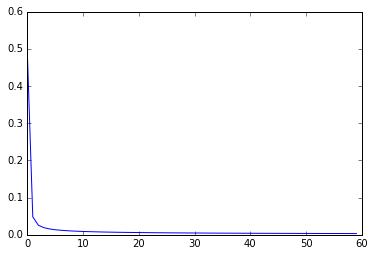

In [22]:
import numpy as np

# input dataset
X = np.array([  [0,0,1],
                [0,1,1],
                [1,0,1],
                [1,1,1] ])
    
print(X.shape)

# output dataset            
y = np.array([[0,1,1,0]]).T

np.random.seed(1)

print(y)

# initial weights
syn0 = 2 * np.random.random((3,5)) - 1
syn1 = 2 * np.random.random((5,1)) - 1

# activation function. derivative is wrt y
def sigmoid(x, deriv=False):
    if deriv:
        return x * (1 - x)
    return 1 / (1 + np.exp(-x))

errs = []

# 4 - number of examples

# 3 - size of input vector (l0)
#     - syn0 = 3,5 weights
# 5 - size of hidden layer (l1)
#     - syn1 = 5,1 weights
# 1 - size of output       (l2)

for i in range(60000):
    l0 = X # 4,3
    l1 = sigmoid(np.dot(l0, syn0)) # 4,3 . 3,5 = 4,5
    l2 = sigmoid(np.dot(l1, syn1)) # 4,5 . 5,1 = 4,1
    
    l2_error = y - l2 # 4,1
    
    if i % 1000 == 0:
        errs.append(np.mean(np.abs(l2_error)))
    
    l2_delta = l2_error * sigmoid(l2, deriv=True)
    
    l1_error = l2_delta.dot(syn1.T) # 4,1 . 1,5 = 4,5 
    
    l1_delta = l1_error * sigmoid(l1, deriv=True)
    
    syn1 += l1.T.dot(l2_delta) #  5,4 . 4,1 = 5,1 
    
    syn0 += l0.T.dot(l1_delta) #  3,4 . 4,5 = 3,5
    
plt.plot(errs)
